In [1]:
# =====================================================
# 2) Veri Keşfi (EDA) ve Görselleştirme
# Upwork Jobs Dataset - Daltonlar Group 
# =====================================================

import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Görselleştirme ayarları
plt.rcParams['figure.figsize'] = (10, 6)
sns.set(style="whitegrid")


In [3]:
# ---------------------------
# 1) Tek CSV dosyasını yükleme (birleştirme yok)
# ---------------------------

# CSV dosyasının bulunduğu klasör
DATA_DIR = r"C:\Users\ayham\Desktop\Upwork_Project\data"
# Kullanılacak CSV dosyası (eğer isim değiştiyse burayı güncelle)
CSV_FILE = "all_upwork_jobs_2024-02-07-2024-03-24.csv"
csv_path = os.path.join(DATA_DIR, CSV_FILE)


In [4]:
# Dosyanın varlığını kontrol et
if not os.path.isfile(csv_path):
    raise FileNotFoundError(f"CSV not found at: {csv_path}")


In [5]:
# CSV'yi Pandas ile oku
df = pd.read_csv(csv_path, low_memory=False)
print("Shape:", df.shape)     # Satır ve sütun sayısı
print("Columns:", list(df.columns))  # Mevcut sütunlar


Shape: (244828, 8)
Columns: ['title', 'link', 'published_date', 'is_hourly', 'hourly_low', 'hourly_high', 'budget', 'country']


In [6]:
# ---------------------------
# 2) Özellik Mühendisliği (Feature Engineering)
# ---------------------------

# Eğer hourly_low ve hourly_high sütunları varsa ortalama alınarak yeni sütun (hourly_rate) oluşturulur
if "hourly_low" in df.columns and "hourly_high" in df.columns:
    df["hourly_rate"] = (pd.to_numeric(df["hourly_low"], errors="coerce") +
                         pd.to_numeric(df["hourly_high"], errors="coerce")) / 2


In [7]:
# Yayınlanma tarihini datetime türüne dönüştür
if "published_date" in df.columns:
    df["published_date"] = pd.to_datetime(df["published_date"], errors="coerce")


In [8]:
# Tüm metin (object) tipindeki sütunlardaki baş/son boşlukları temizle
for c in df.select_dtypes(include=["object"]).columns:
    df[c] = df[c].astype(str).str.strip()


In [9]:
# ---------------------------
# 3) Grafikler için örnekleme (Sampling)
# ---------------------------

# Çok büyük veri setlerinde çizim yavaş olabileceği için örnekleme yapıyoruz
PLOT_MAX = 50000  # Maksimum 50.000 satır çizimde kullanılacak (daha fazlaysa örnek alır)
plot_df = df.sample(PLOT_MAX, random_state=42) if len(df) > PLOT_MAX else df.copy()
print("Plot sample shape:", plot_df.shape)  # Çizim için kullanılan alt veri setinin boyutu


Plot sample shape: (50000, 9)


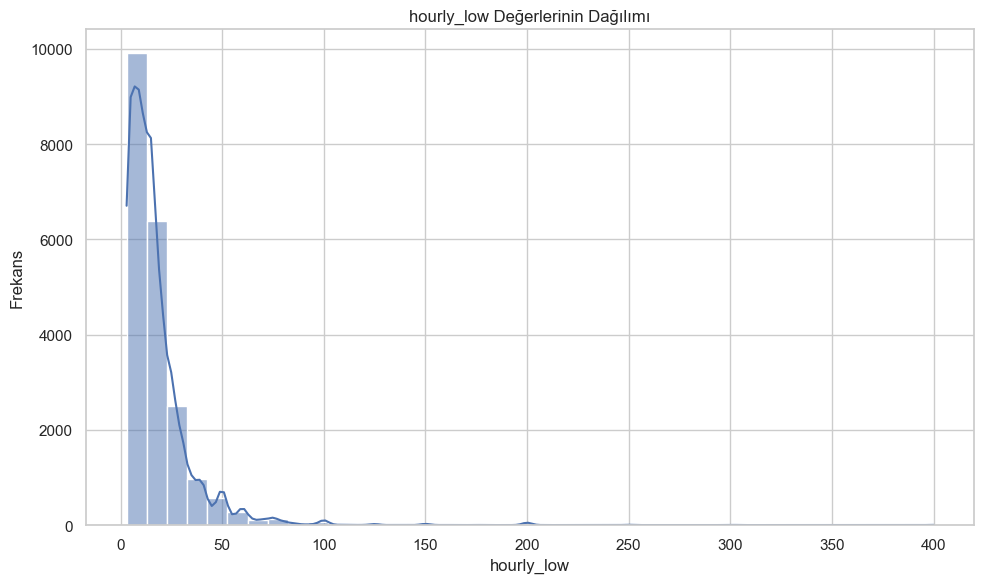

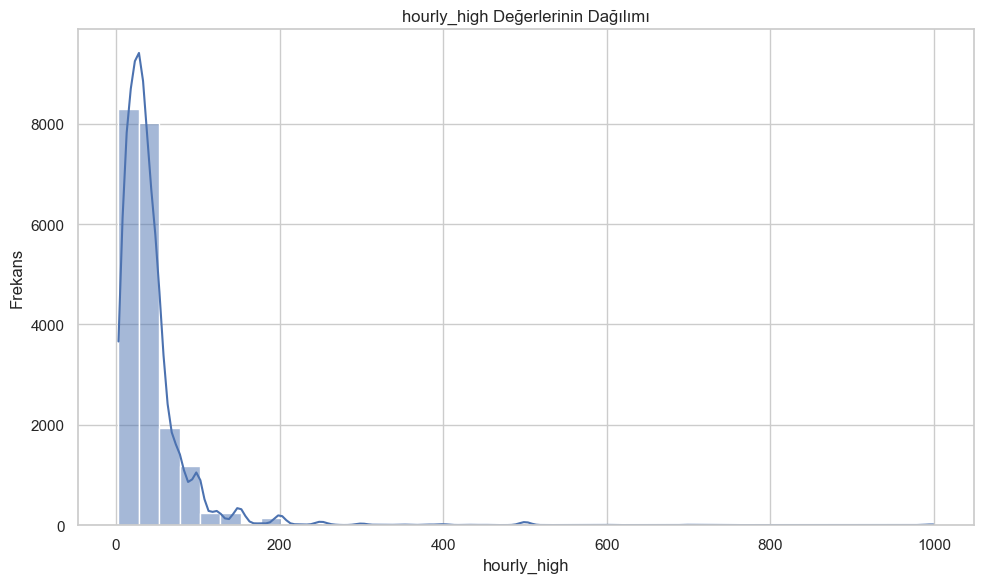

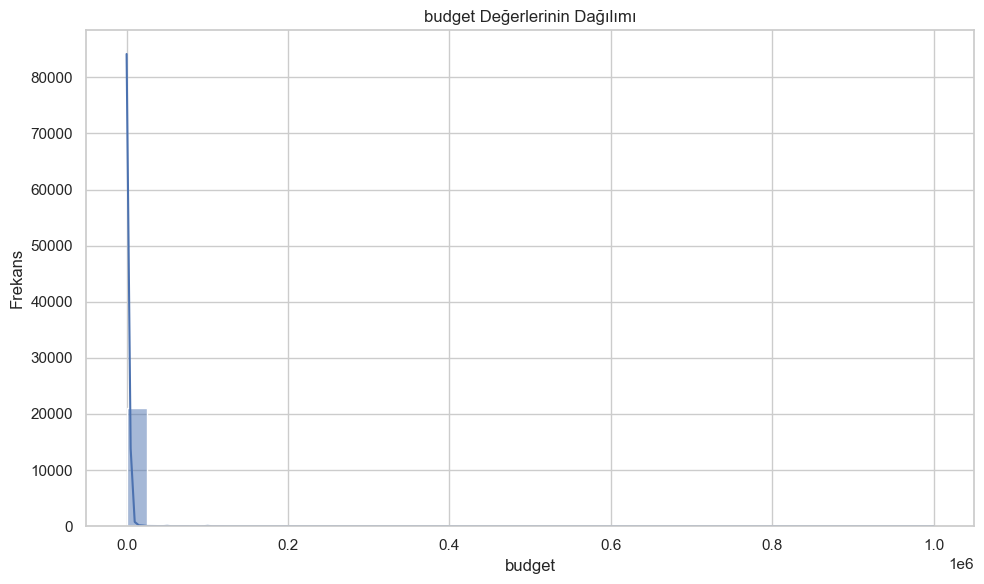

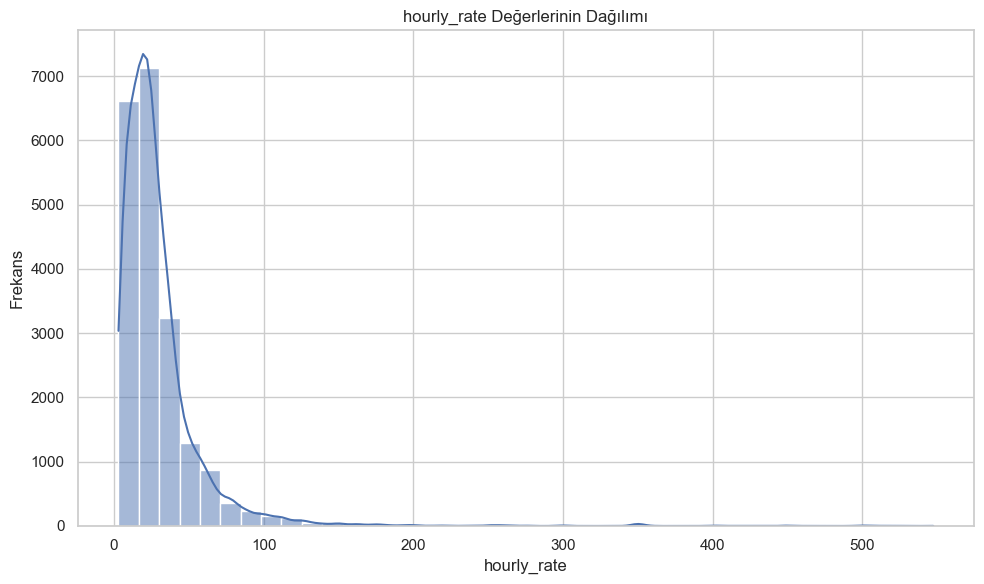

In [10]:
# ---------------------------
# 4) Temel Dağılımlar (Sayısal Değerler)
# ---------------------------

# Sadece sayısal sütunları seç
num_cols = plot_df.select_dtypes(include=[np.number]).columns.tolist()

if num_cols:
    # Görselleştirme hızını korumak için en fazla 5 sayısal sütunu çizer
    for col in num_cols[:5]:
        plt.figure()
        sns.histplot(plot_df[col].dropna(), bins=40, kde=True)
        plt.title(f"{col} Değerlerinin Dağılımı")
        plt.xlabel(col)
        plt.ylabel("Frekans")
        plt.tight_layout()
        plt.show()
else:
    print("Görselleştirilecek sayısal sütun bulunamadı.")


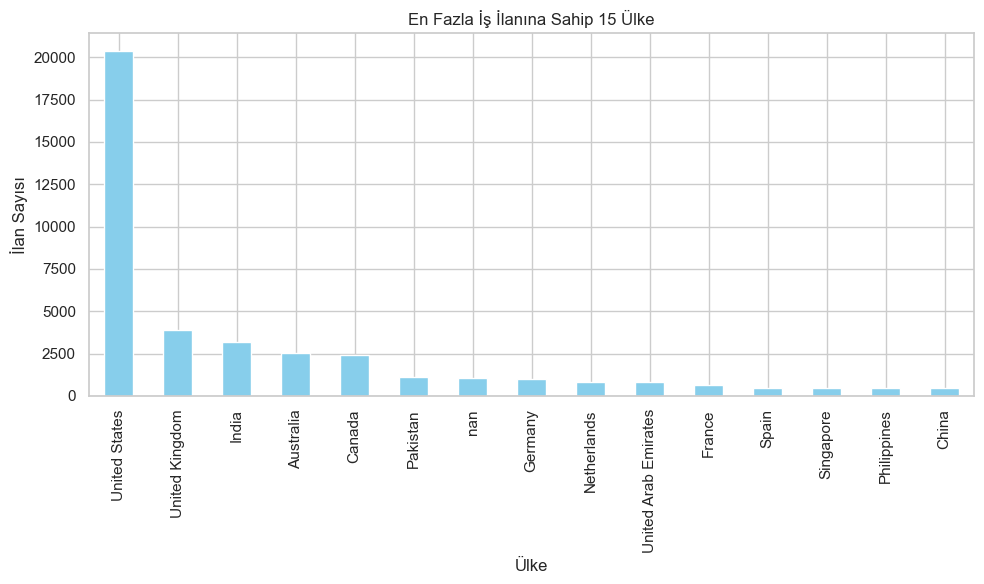

In [11]:
# ---------------------------
# 5) En Çok İş İlanı Olan Ülkeler
# ---------------------------
if "country" in plot_df.columns:
    plt.figure()
    plot_df["country"].value_counts().head(15).plot(kind="bar", color="skyblue")
    plt.title("En Fazla İş İlanına Sahip 15 Ülke")
    plt.xlabel("Ülke")
    plt.ylabel("İlan Sayısı")
    plt.tight_layout()
    plt.show()
else:
    print("'country' sütunu bulunamadı.")


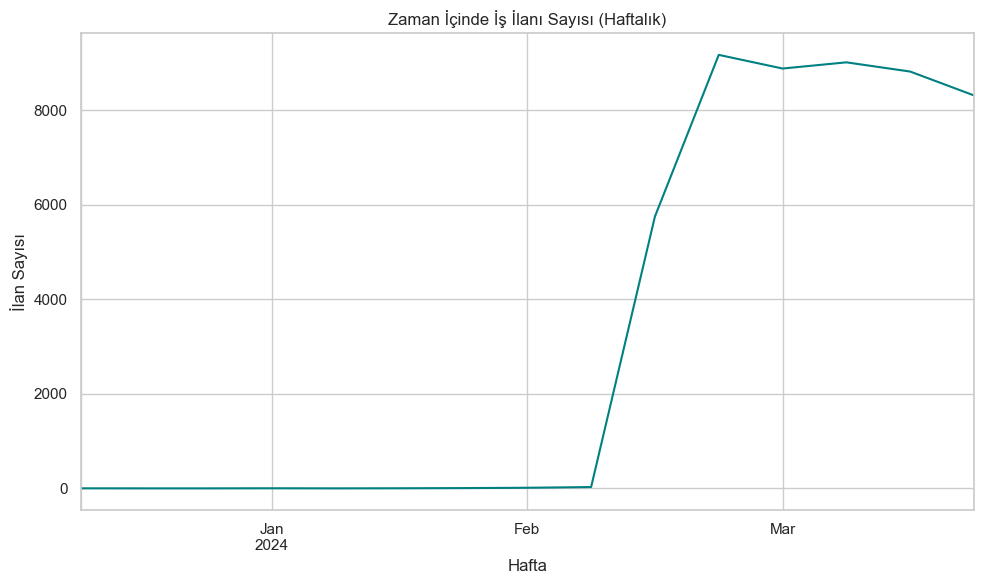

In [12]:
# ---------------------------
# 6) Zaman İçinde İş İlanı Sayısı (Haftalık)
# ---------------------------
if "published_date" in plot_df.columns:
    # Tarih sütunu boş olmayan satırları al
    df_time = plot_df.dropna(subset=["published_date"]).copy()
    if not df_time.empty:
        # Haftalık gruplama yap ve ilan sayılarını say
        weekly_counts = df_time.set_index("published_date").resample("W").size()
        plt.figure()
        weekly_counts.plot(title="Zaman İçinde İş İlanı Sayısı (Haftalık)", color="teal")
        plt.xlabel("Hafta")
        plt.ylabel("İlan Sayısı")
        plt.tight_layout()
        plt.show()
    else:
        print("Zaman serisi çizimi için geçerli tarih verisi bulunamadı.")
else:
    print("'published_date' sütunu zaman analizi için bulunamadı.")


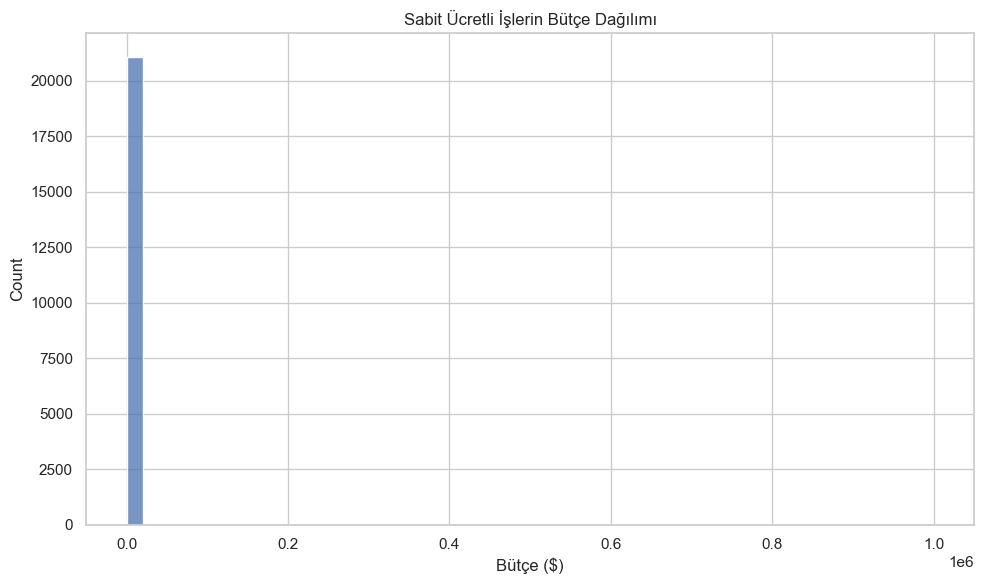

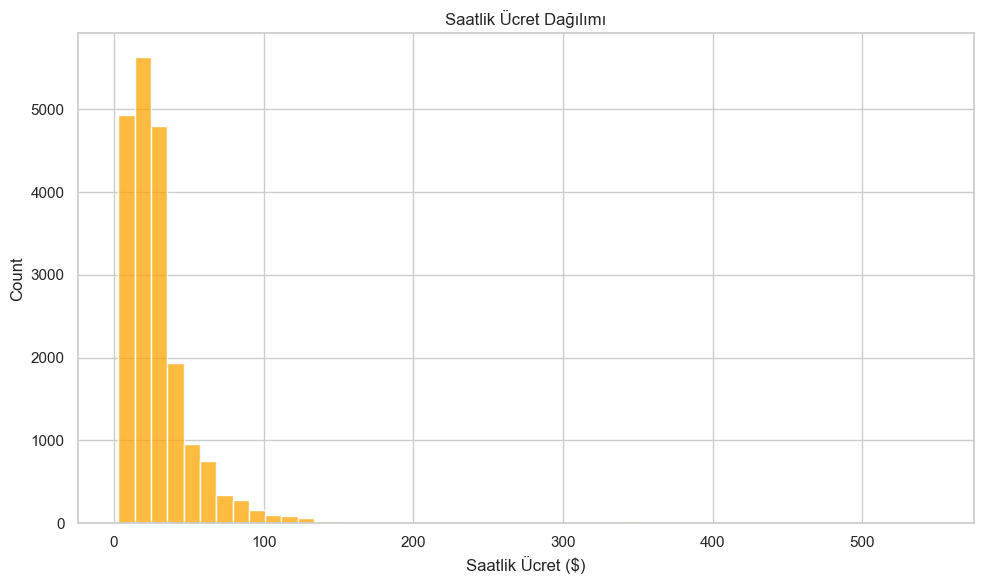

In [13]:
# ---------------------------
# 7) Bütçe ve Saatlik Ücret Dağılımları
# ---------------------------

# Sabit ücretli işler (fixed jobs) için bütçe dağılımı
if "budget" in plot_df.columns:
    plt.figure()
    sns.histplot(plot_df["budget"].dropna(), bins=50)
    plt.title("Sabit Ücretli İşlerin Bütçe Dağılımı")
    plt.xlabel("Bütçe ($)")
    plt.tight_layout()
    plt.show()

# Saatlik işler için saatlik ücret dağılımı
if "hourly_rate" in plot_df.columns:
    plt.figure()
    sns.histplot(plot_df["hourly_rate"].dropna(), bins=50, color="orange")
    plt.title("Saatlik Ücret Dağılımı")
    plt.xlabel("Saatlik Ücret ($)")
    plt.tight_layout()
    plt.show()


In [14]:
print("\n EDA başarıyla tamamlandı!")



 EDA başarıyla tamamlandı!
